In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
# Allow loading crc_ml scripts as modules
import sys
from pathlib import Path
module_path = Path('.').resolve().parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))

In [4]:
from src.visualization import draw_heatmap_slide

In [3]:
PROBA_DIR = Path('/home/matejg/Project/crc_ml/models/evaluations/GLADOS-CHCK-fbde-4168-bebb-c25726e5aa5a/test/probas/')

In [9]:
SLIDE_DIR = Path('/mnt/data/crc_ml/data/raw/Prostata/slides/')
LEVEL = 0
TILE_SIZE = 96*2
FIG_DIR = Path('/home/matejg/Project/crc_ml/models/evaluations/GLADOS-CHCK-fbde-4168-bebb-c25726e5aa5a/test/figs/')
for proba_f in PROBA_DIR.iterdir():
    slide_name = proba_f.stem
    if slide_name != 'TP-2019_6786-09-0':
        continue
    print('-- FOUND --')
    probas = pd.read_csv(proba_f, sep=';')
    fig_filepath = FIG_DIR / '{}-vis.png'.format(slide_name)
    #draw_heatmap_slide(slide_name, SLIDE_DIR, LEVEL, TILE_SIZE, probas, fig_filepath)

FileNotFoundError: [Errno 2] No such file or directory: '/home/matejg/Project/crc_ml/models/evaluations/GLADOS-CHCK-fbde-4168-bebb-c25726e5aa5a/test/probas'

In [5]:
import openslide as oslide

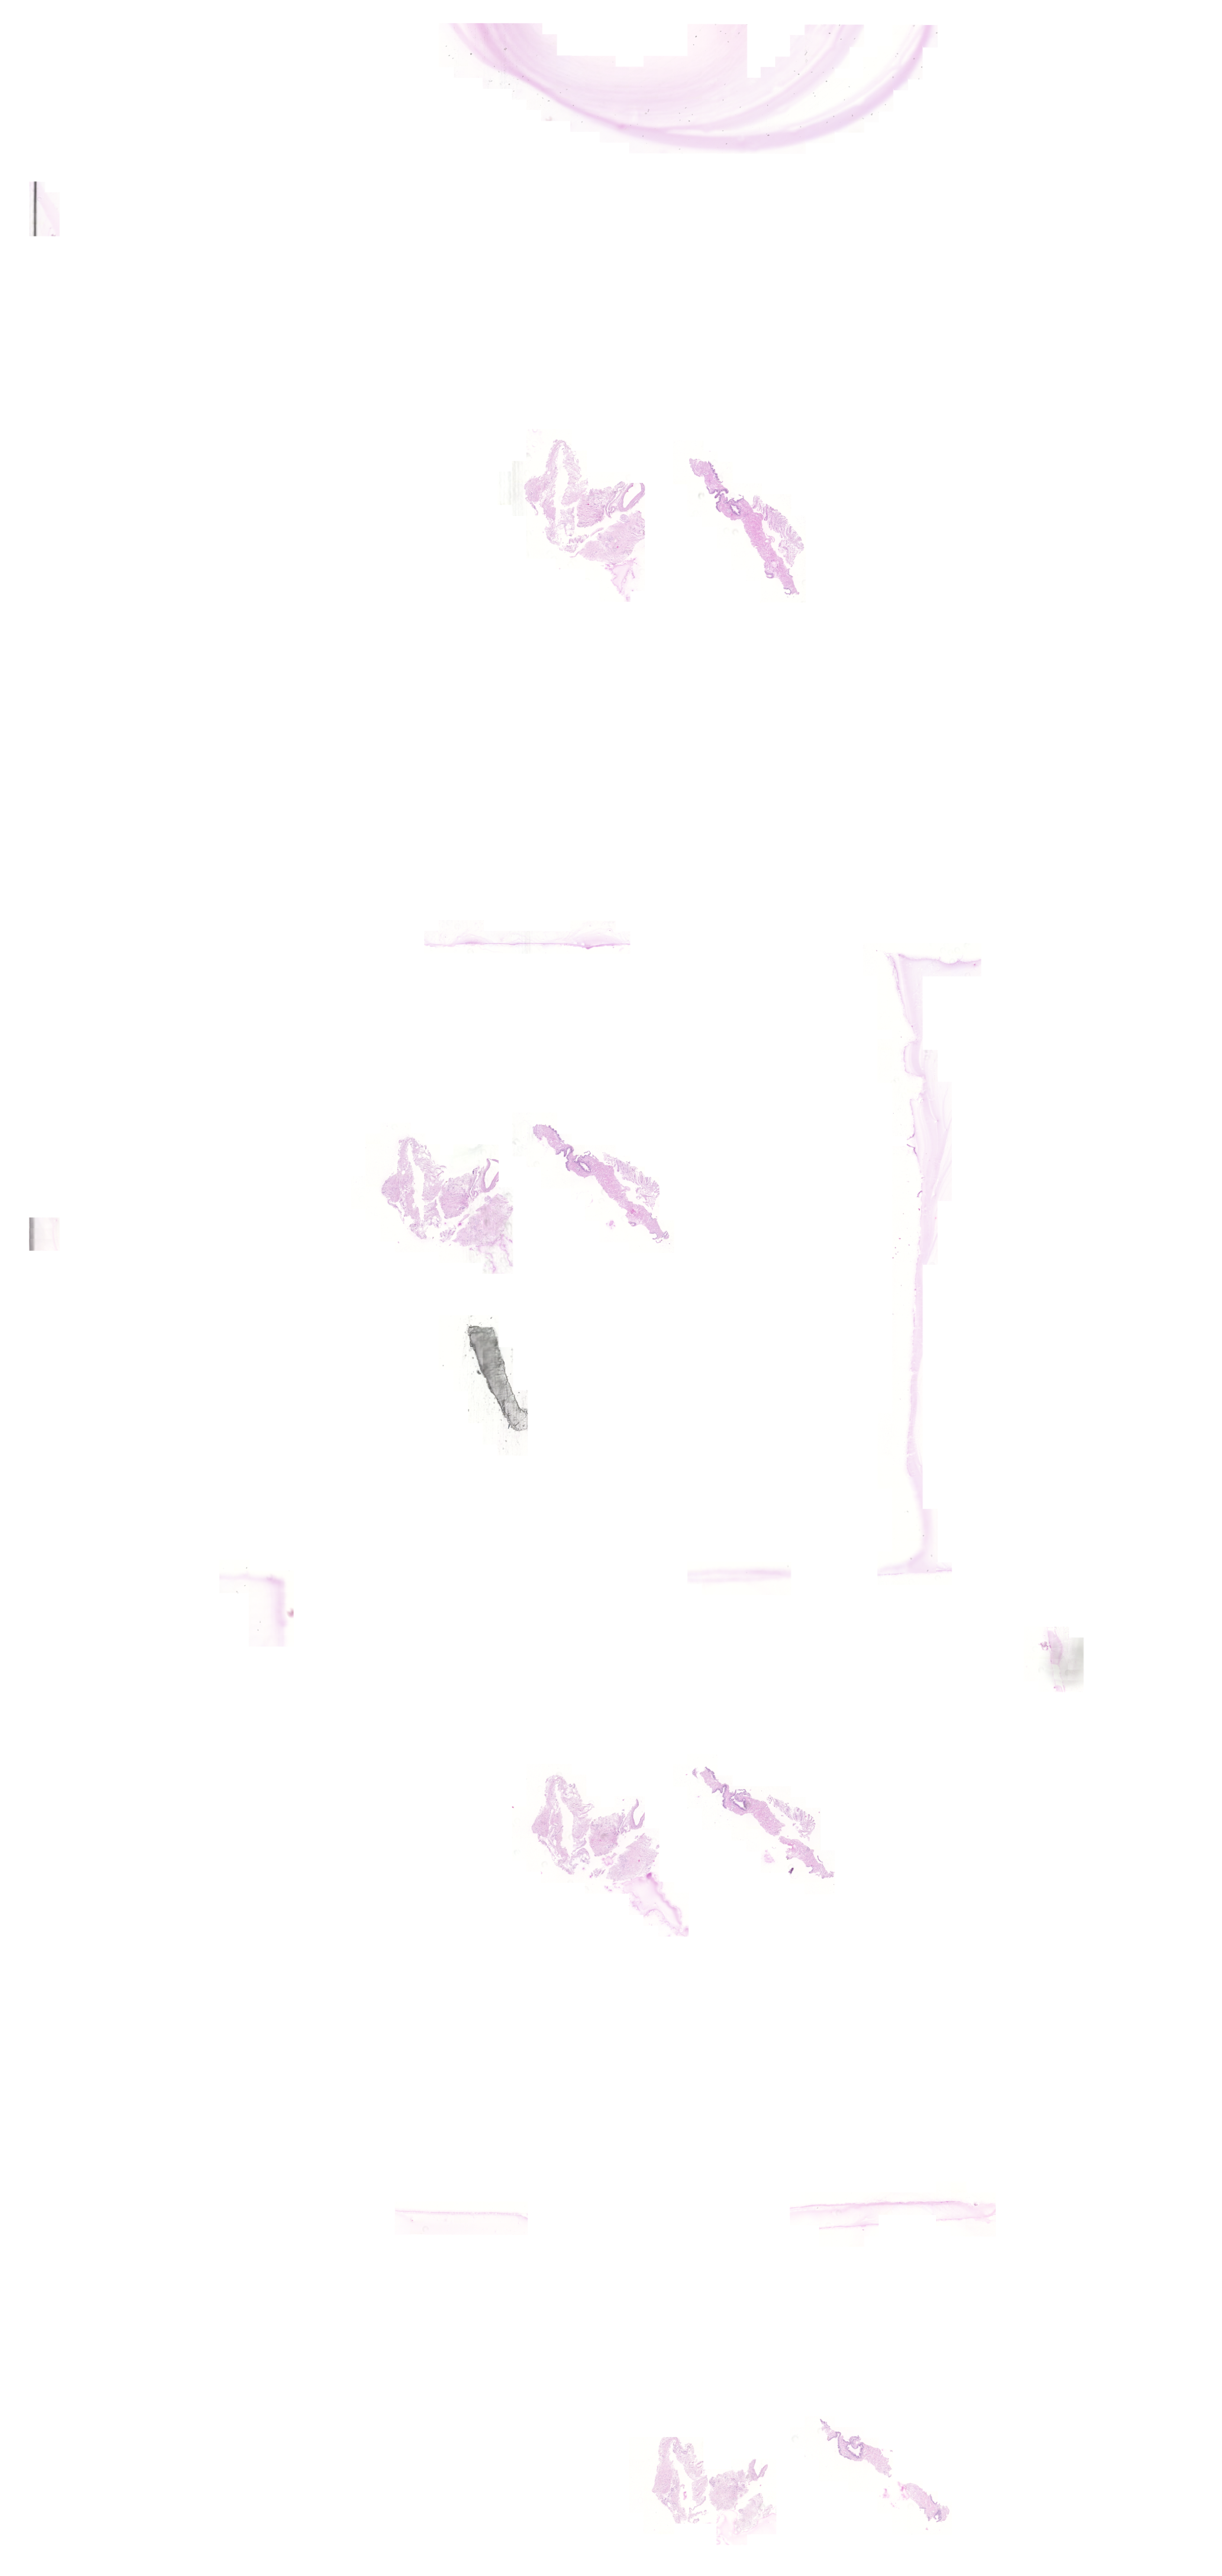

In [20]:
slide = oslide.open_slide(str((SLIDE_DIR / 'TP-2019_6786-09-0.mrxs').resolve()))
im = slide.read_region((0,0), 5, slide.level_dimensions[5])
im = np.array(im)
im[im[...,-1]==0] = [255,255,255,0]
Image.fromarray(im).convert('RGB')

In [26]:
im = slide.get_thumbnail(slide.level_dimensions[5])
im = np.array(im)
im[:96, :96, :]

'FFFFFF'

In [16]:
import pandas as pd

In [17]:
probas

,Unnamed: 0,coord_x,coord_y,tumor_tile,predict
0,0,21120.0,103488.0,0,0.7650
1,1,21312.0,103488.0,0,0.6695
2,2,21504.0,103488.0,0,0.6365
3,3,21504.0,103680.0,0,0.7941
4,4,21696.0,103488.0,0,0.6755
...,...,...,...,...,...
5853,5853,94080.0,170496.0,0,0.3925
5854,5854,94272.0,170496.0,0,0.6023
5855,5855,95616.0,98304.0,0,0.3937
5856,5856,99072.0,91776.0,0,0.1512
